In [2]:
import pandas as pd
import geopandas as gpd
import os
import matplotlib as plt
from shapely.geometry import Point

In [3]:
datapath = r'/home/james/Documents/SDG_11.2.1/data'

In [4]:
stops_df = pd.read_csv(os.path.join(datapath,'Stops.txt'), delimiter='\t')
stops_df.sample(15)


,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type
362667,6400PT1464,36325395,"West Ferry/Broughty Ferry, Dunnotar Place (at)",56.47224,-2.90086,NaN,3.0
358139,630031231,23626763,"Ellon, Raeburn Place (at)",57.37156,-2.08661,NaN,3.0
59201,1180PLA88888,plypgdg,"Plymouth City Centre, Royal Parade Dummy (E-bo...",50.37067,-4.14242,NaN,3.0
188282,3200YNE02020,32002020,"Pickering, Westlands Mayfield (S-bound)",54.24969,-0.77199,NaN,3.0
226282,390030122,sufamdtw,"Ipswich, Station Hotel (adj)",52.05082,1.14583,NaN,3.0
69993,13006856A,durdtmam,"Aycliffe Industrial Estate, Moores Factory (N-...",54.60154,-1.57102,NaN,3.0
220855,3800C420401,stadpdgt,"Little Aston, Woodside Drive (Opp)",52.60031,-1.86102,NaN,3.0
334014,5810WDB48050,swatjpm,"Cwmrhydyceirw, Heol-y-Deri",51.67740,-3.92467,NaN,3.0
198384,340000130SAX,oxfampap,"Caldecott, Wilsham Road (N-bound)",51.66341,-1.28336,NaN,3.0
70760,1400CTNG1,NaN,"Collington, Collington Rail Station (Entrance)",50.83977,0.45780,NaN,NaN


In [5]:

def make_geo_df(df,col_x, col_y):
    crs = 'wsg84'
    geometry = [Point(xy) for xy in zip(df[col_x], df[col_y])]
    geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
    return geo_df

In [6]:
stops_geo_df = make_geo_df(stops_df,'stop_lat','stop_lon')

In [7]:
stops_geo_df.sample(10)

,stop_id,stop_code,stop_name,stop_lat,stop_lon,stop_url,vehicle_type,geometry
163254,2700LHO00956,linagtgj,"Harlaxton, Trotter's Lane (opp)",52.88437,-0.68683,NaN,3.0,POINT (52.88437 -0.68683)
13453,039025960001,rdgapjp,"Caversham Park Village, Earlsfield Close (opp 6b)",51.47692,-0.94606,NaN,3.0,POINT (51.47692 -0.94606)
246019,4200F033300,warapjdp,"Kingsbury, Mill Crescent (Nr)",52.56006,-1.68216,NaN,3.0,POINT (52.56006 -1.68216)
237344,40004411264B,surdwgja,"Charterhouse, Stag Hill Motors (adj)",51.20074,-0.63091,NaN,3.0,POINT (51.20074 -0.63091)
330190,5710AWA11027,cdijwtd,"Pantmawr, Rhiwbina Hill",51.53076,-3.22391,NaN,3.0,POINT (51.53076 -3.22391)
1074,0100BRA10617,bstajwj,"Sea Mills, Sea Mills Square (Stop b)",51.48790,-2.64754,NaN,3.0,POINT (51.48790 -2.64754)
147414,2500IMG2839,langjdag,"Stoops Estate, Laburnum Close (opp)",53.77975,-2.26328,NaN,3.0,POINT (53.77975 -2.26328)
157209,269032059,lecdpgta,"Beaumont Leys, Baxters Close (adj)",52.65874,-1.16088,NaN,3.0,POINT (52.65874 -1.16088)
350333,61701082,62927238,"Dalry, Vennal Street (before)",55.70582,-4.72611,NaN,3.0,POINT (55.70582 -4.72611)
208924,3600SOB20061,sotadatp,"Allerford, Stoates Farm (SE-bound)",51.21252,-3.57109,NaN,3.0,POINT (51.21252 -3.57109)


In [8]:
# Building the map of london

map_data_path = '/home/james/Documents/SDG_11.2.1/data/Statistical-GIS-boundaries-london/statistical-gis-boundaries-london/ESRI'

map_df = gpd.read_file(os.path.join(map_data_path,'London_Borough_Excluding_MHW.shp'))

# OA_2011_London_gen_MHW.shp'

In [9]:
map_df.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


In [15]:
map_df.to_crs(epsg=27700)
stops_geo_df.crs = 'epsg:27700'

# epsg:27700


In [16]:
map_df.crs

{'init': 'epsg:27700'}

In [17]:
stops_geo_df.crs

'epsg:27700'

In [18]:
# Wandsworth_034B_df = map_df[map_df['LSOA11NM']=='Wandsworth 034B']

In [19]:
k_u_thames = map_df[map_df['NAME']=='Kingston upon Thames']
k_u_thames.geometry

0    POLYGON ((516401.600 160201.800, 516407.300 16...
Name: geometry, dtype: geometry

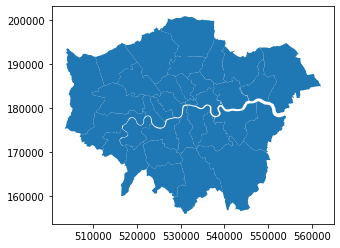

In [20]:
map_df.plot()

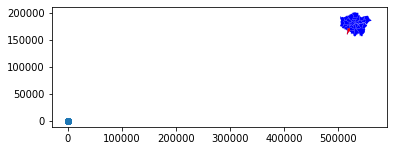

In [21]:
fig, ax = plt.pyplot.subplots()

# _ = Wandsworth_034B_df.plot(ax=ax, facecolor='red')
_ = map_df.plot(ax=ax, facecolor='blue')
_ = k_u_thames.plot(ax=ax, facecolor='red')
_ = stops_geo_df.plot(ax=ax)


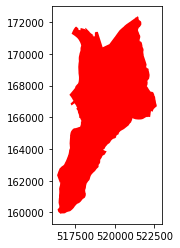

In [22]:
_ = k_u_thames.plot(facecolor='red')

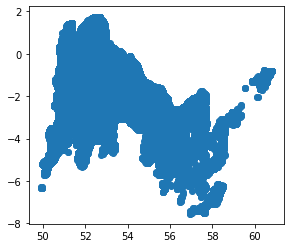

In [23]:
_ = stops_geo_df.plot()